In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
# downloading dataset from kaggle
!kaggle datasets download -d ismailpromus/skin-diseases-image-dataset

100% 5.19G/5.19G [04:14<00:00, 24.9MB/s]
100% 5.19G/5.19G [04:14<00:00, 21.9MB/s]


In [3]:
# Unzip the folder
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-diseases-image-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# importing al the dependencies
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files
import os
from shutil import copyfile
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import numpy as np
import random
from keras.callbacks import ModelCheckpoint

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Note
Since our dataset did'nt have data for clean skins. So we manually collected data for it and store it in the folder named "Cleaned_Skin" and after zipping we moved Cleaned_Skin to the required destination


In [6]:
# changing the name of the folders
old_name = r"/content/IMG_CLASSES/1. Eczema 1677"
new_name = r"/content/IMG_CLASSES/Eczema"
os.rename(old_name, new_name)

In [7]:
old_name = r"/content/IMG_CLASSES/10. Warts Molluscum and other Viral Infections - 2103"
new_name = r"/content/IMG_CLASSES/Warts_Molluscum_And_Other_Viral_Infections"
os.rename(old_name, new_name)
old_name = r"/content/IMG_CLASSES/2. Melanoma 15.75k"
new_name = r"/content/IMG_CLASSES/Melanoma"
os.rename(old_name, new_name)
old_name = r"/content/IMG_CLASSES/3. Atopic Dermatitis - 1.25k"
new_name = r"/content/IMG_CLASSES/Atopic_Dermatitis"
os.rename(old_name, new_name)
old_name = r"/content/IMG_CLASSES/4. Basal Cell Carcinoma (BCC) 3323"
new_name = r"/content/IMG_CLASSES/Basal_Cell_Carcinoma"
os.rename(old_name, new_name)
old_name = r"/content/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970"
new_name = r"/content/IMG_CLASSES/Melanocytic_Nevi"
os.rename(old_name, new_name)
old_name = r"/content/IMG_CLASSES/6. Benign Keratosis-like Lesions (BKL) 2624"
new_name = r"/content/IMG_CLASSES/Benign_Keratosis_Like_Lesions"
os.rename(old_name, new_name)
old_name = r"/content/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k"
new_name = r"/content/IMG_CLASSES/Lichen_Planus"
os.rename(old_name, new_name)
old_name = r"/content/IMG_CLASSES/8. Seborrheic Keratoses and other Benign Tumors - 1.8k"
new_name = r"/content/IMG_CLASSES/Seborrheic_Keratoses"
os.rename(old_name, new_name)
old_name = r"/content/IMG_CLASSES/9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k"
new_name = r"/content/IMG_CLASSES/Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections"
os.rename(old_name, new_name)

In [43]:

# lets check the number of images we have
print(f"Total number of Atopic Dermatitis images are {len(os.listdir('/content/IMG_CLASSES/Atopic_Dermatitis/'))}")
print(f"Total number of Basal Cell Carcinoma are {len(os.listdir('/content/IMG_CLASSES/Basal_Cell_Carcinoma/'))}")
print(f"Total number of Benign Keratosis Like Lesions are {len(os.listdir('/content/IMG_CLASSES/Benign_Keratosis_Like_Lesions/'))}")
print(f"Total number of Eczema are {len(os.listdir('/content/IMG_CLASSES/Eczema/'))}")
print(f"Total number of Lichen Planus are {len(os.listdir('/content/IMG_CLASSES/Lichen_Planus/'))}")
print(f"Total number of Melanocytic Nevi are {len(os.listdir('/content/IMG_CLASSES/Melanocytic_Nevi/'))}")
print(f"Total number of Melanoma are {len(os.listdir('/content/IMG_CLASSES/Melanoma/'))}")
print(f"Total number of Seborrheic Keratoses are {len(os.listdir('/content/IMG_CLASSES/Seborrheic_Keratoses/'))}")
print(f"Total number of Tinea Ringworm Candidiasis and Other fungal infections are {len(os.listdir('/content/IMG_CLASSES/Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections/'))}")
print(f"Total number of Warts Molluscum and other viral infections are {len(os.listdir('/content/IMG_CLASSES/Warts_Molluscum_And_Other_Viral_Infections/'))}")
print(f"Total number of clear skin images {len(os.listdir('/content/IMG_CLASSES/Clean_Skin/'))}")



Total number of Atopic Dermatitis images are 1257
Total number of Basal Cell Carcinoma are 3323
Total number of Benign Keratosis Like Lesions are 2079
Total number of Eczema are 1677
Total number of Lichen Planus are 2055
Total number of Melanocytic Nevi are 3500
Total number of Melanoma are 3140
Total number of Seborrheic Keratoses are 1847
Total number of Tinea Ringworm Candidiasis and Other fungal infections are 1702
Total number of Warts Molluscum and other viral infections are 2103
Total number of clear skin images 284


We can see that the class "Melanocytic Nevi" has 7970 images and other classes have around 3000 images except for clear skin images. so we downsample the number of images in "Melanocytic Nevi" class to 3500 and augment other classes so that total number of images in each class will be 3500 

In [9]:
path = r'/content/IMG_CLASSES/Melanocytic_Nevi/'
n= 4470
img_names = os.listdir(path)
img_names=random.sample(img_names,n)
for image in img_names:
  f = os.path.join(path, image)
  os.remove(f)

In [11]:

# lets see number of images after downsampling
print(f"Total number of Atopic Dermatitis images are {len(os.listdir('/content/IMG_CLASSES/Atopic_Dermatitis/'))}")
print(f"Total number of Basal Cell Carcinoma are {len(os.listdir('/content/IMG_CLASSES/Basal_Cell_Carcinoma/'))}")
print(f"Total number of Benign Keratosis Like Lesions are {len(os.listdir('/content/IMG_CLASSES/Benign_Keratosis_Like_Lesions/'))}")
print(f"Total number of Eczema are {len(os.listdir('/content/IMG_CLASSES/Eczema/'))}")
print(f"Total number of Lichen Planus are {len(os.listdir('/content/IMG_CLASSES/Lichen_Planus/'))}")
print(f"Total number of Melanocytic Nevi are {len(os.listdir('/content/IMG_CLASSES/Melanocytic_Nevi/'))}")
print(f"Total number of Melanoma are {len(os.listdir('/content/IMG_CLASSES/Melanoma/'))}")
print(f"Total number of Seborrheic Keratoses are {len(os.listdir('/content/IMG_CLASSES/Seborrheic_Keratoses/'))}")
print(f"Total number of Tinea Ringworm Candidiasis and Other fungal infections are {len(os.listdir('/content/IMG_CLASSES/Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections/'))}")
print(f"Total number of Warts Molluscum and other viral infections are {len(os.listdir('/content/IMG_CLASSES/Warts_Molluscum_And_Other_Viral_Infections/'))}")
print(f"Total number of clear skin images {len(os.listdir('/content/IMG_CLASSES/Clean_Skin/'))}")



Total number of Atopic Dermatitis images are 1257
Total number of Basal Cell Carcinoma are 3323
Total number of Benign Keratosis Like Lesions are 2079
Total number of Eczema are 1677
Total number of Lichen Planus are 2055
Total number of Melanocytic Nevi are 3500
Total number of Melanoma are 3140
Total number of Seborrheic Keratoses are 1847
Total number of Tinea Ringworm Candidiasis and Other fungal infections are 1702
Total number of Warts Molluscum and other viral infections are 2103
Total number of clear skin images 284


### Creating new directories

In [12]:
try:
  os.mkdir("/content/drive/MyDrive/skin-diseases")
  os.mkdir("/content/drive/MyDrive/skin-diseases/training")
  os.mkdir("/content/drive/MyDrive/skin-diseases/testing")
  os.mkdir("/content/drive/MyDrive/skin-diseases/training/Atopic_Dermatitis")
  os.mkdir("/content/drive/MyDrive/skin-diseases/training/Basal_Cell_Carcinoma")
  os.mkdir("/content/drive/MyDrive/skin-diseases/training/Benign_Keratosis_Like_Lesions")
  os.mkdir("/content/drive/MyDrive/skin-diseases/training/Eczema")
  os.mkdir("/content/drive/MyDrive/skin-diseases/training/Lichen_Planus")
  os.mkdir("/content/drive/MyDrive/skin-diseases/training/Melanocytic_Nevi")
  os.mkdir("/content/drive/MyDrive/skin-diseases/training/Melanoma")
  os.mkdir("/content/drive/MyDrive/skin-diseases/training/Seborrheic_Keratoses")
  os.mkdir("/content/drive/MyDrive/skin-diseases/training/Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections")
  os.mkdir("/content/drive/MyDrive/skin-diseases/training/Warts_Molluscum_And_Other_Viral_Infections")
  os.mkdir("/content/drive/MyDrive/skin-diseases/training/Clean_Skin")

  os.mkdir("/content/drive/MyDrive/skin-diseases/testing/Atopic_Dermatitis")
  os.mkdir("/content/drive/MyDrive/skin-diseases/testing/Basal_Cell_Carcinoma")
  os.mkdir("/content/drive/MyDrive/skin-diseases/testing/Benign_Keratosis_Like_Lesions")
  os.mkdir("/content/drive/MyDrive/skin-diseases/testing/Eczema")
  os.mkdir("/content/drive/MyDrive/skin-diseases/testing/Lichen_Planus")
  os.mkdir("/content/drive/MyDrive/skin-diseases/testing/Melanocytic_Nevi")
  os.mkdir("/content/drive/MyDrive/skin-diseases/testing/Melanoma")
  os.mkdir("/content/drive/MyDrive/skin-diseases/testing/Seborrheic_Keratoses")
  os.mkdir("/content/drive/MyDrive/skin-diseases/testing/Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections")
  os.mkdir("/content/drive/MyDrive/skin-diseases/testing/Warts_Molluscum_And_Other_Viral_Infections")  
  os.mkdir("/content/drive/MyDrive/skin-diseases/testing/Clean_Skin")
  
except OSError:
  pass

### Splitting Data to Training and Testing Set

In [13]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename, "zero length files, ignoring!")
  
  training_length = int(len(files) * SPLIT_SIZE)
  validation_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  validation_set = shuffled_set[0:validation_length]

  for filename in training_set:
    this_file = SOURCE + filename
    destination = TRAINING + filename
    copyfile(this_file, destination)

  for filename in validation_set:
    this_file = SOURCE + filename
    destination = VALIDATION + filename
    copyfile(this_file, destination)

In [14]:
SPLIT_SIZE = 0.9

Atopic_Dermatitis_Source_Dir = "/content/IMG_CLASSES/Atopic_Dermatitis/"
Atopic_Dermatitis_Training_Dir = "/content/drive/MyDrive/skin-diseases/training/Atopic_Dermatitis/"
Atopic_Dermatitis_Testing_Dir = "/content/drive/MyDrive/skin-diseases/testing/Atopic_Dermatitis/"

split_data(Atopic_Dermatitis_Source_Dir, Atopic_Dermatitis_Training_Dir, Atopic_Dermatitis_Testing_Dir, SPLIT_SIZE)

Basal_Cell_Carcinoma_Source_Dir = "/content/IMG_CLASSES/Basal_Cell_Carcinoma/"
Basal_Cell_Carcinoma_Training_Dir = "/content/drive/MyDrive/skin-diseases/training/Basal_Cell_Carcinoma/"
Basal_Cell_Carcinoma_Testing_Dir = "/content/drive/MyDrive/skin-diseases/testing/Basal_Cell_Carcinoma/"

split_data(Basal_Cell_Carcinoma_Source_Dir, Basal_Cell_Carcinoma_Training_Dir, Basal_Cell_Carcinoma_Testing_Dir, SPLIT_SIZE)


Benign_Keratosis_Like_Lesions_Source_Dir = "/content/IMG_CLASSES/Benign_Keratosis_Like_Lesions/"
Benign_Keratosis_Like_Lesions_Training_Dir = "/content/drive/MyDrive/skin-diseases/training/Benign_Keratosis_Like_Lesions/"
Benign_Keratosis_Like_Lesions_Testing_Dir = "/content/drive/MyDrive/skin-diseases/testing/Benign_Keratosis_Like_Lesions/"

split_data(Benign_Keratosis_Like_Lesions_Source_Dir, Benign_Keratosis_Like_Lesions_Training_Dir, Benign_Keratosis_Like_Lesions_Testing_Dir, SPLIT_SIZE)


Eczema_Source_Dir = "/content/IMG_CLASSES/Eczema/"
Eczema_Training_Dir = "/content/drive/MyDrive/skin-diseases/training/Eczema/"
Eczema_Testing_Dir = "/content/drive/MyDrive/skin-diseases/testing/Eczema/"

split_data(Eczema_Source_Dir, Eczema_Training_Dir, Eczema_Testing_Dir, SPLIT_SIZE)

Clean_Skin_Source_Dir = "/content/IMG_CLASSES/Clean_Skin/"
Clean_Skin_Training_Dir = "/content/drive/MyDrive/skin-diseases/training/Clean_Skin/"
Clean_Skin_Testing_Dir = "/content/drive/MyDrive/skin-diseases/testing/Clean_Skin/"

split_data(Clean_Skin_Source_Dir, Clean_Skin_Training_Dir, Clean_Skin_Testing_Dir, SPLIT_SIZE)

Lichen_Planus_Source_Dir = "/content/IMG_CLASSES/Lichen_Planus/"
Lichen_Planus_Training_Dir = "/content/drive/MyDrive/skin-diseases/training/Lichen_Planus/"
Lichen_Planus_Testing_Dir = "/content/drive/MyDrive/skin-diseases/testing/Lichen_Planus/"

split_data(Lichen_Planus_Source_Dir, Lichen_Planus_Training_Dir, Lichen_Planus_Testing_Dir, SPLIT_SIZE)

Melanocytic_Nevi_Source_Dir = "/content/IMG_CLASSES/Melanocytic_Nevi/"
Melanocytic_Nevi_Training_Dir = "/content/drive/MyDrive/skin-diseases/training/Melanocytic_Nevi/"
Melanocytic_Nevi_Testing_Dir = "/content/drive/MyDrive/skin-diseases/testing/Melanocytic_Nevi/"

split_data(Melanocytic_Nevi_Source_Dir, Melanocytic_Nevi_Training_Dir, Melanocytic_Nevi_Testing_Dir, SPLIT_SIZE)

Melanoma_Source_Dir = "/content/IMG_CLASSES/Melanoma/"
Melanoma_Training_Dir = "/content/drive/MyDrive/skin-diseases/training/Melanoma/"
Melanoma_Testing_Dir = "/content/drive/MyDrive/skin-diseases/testing/Melanoma/"

split_data(Melanoma_Source_Dir, Melanoma_Training_Dir, Melanoma_Testing_Dir, SPLIT_SIZE)

Seborrheic_Keratoses_Source_Dir = "/content/IMG_CLASSES/Seborrheic_Keratoses/"
Seborrheic_Keratoses_Training_Dir = "/content/drive/MyDrive/skin-diseases/training/Seborrheic_Keratoses/"
Seborrheic_Keratoses_Testing_Dir = "/content/drive/MyDrive/skin-diseases/testing/Seborrheic_Keratoses/"

split_data(Seborrheic_Keratoses_Source_Dir, Seborrheic_Keratoses_Training_Dir, Seborrheic_Keratoses_Testing_Dir, SPLIT_SIZE)

Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections_Source_Dir = "/content/IMG_CLASSES/Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections/"
Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections_Training_Dir = "/content/drive/MyDrive/skin-diseases/training/Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections/"
Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections_Testing_Dir = "/content/drive/MyDrive/skin-diseases/testing/Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections/"

split_data(Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections_Source_Dir, Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections_Training_Dir, Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections_Testing_Dir, SPLIT_SIZE)

Warts_Molluscum_And_Other_Viral_Infections_Source_Dir = "/content/IMG_CLASSES/Warts_Molluscum_And_Other_Viral_Infections/"
Warts_Molluscum_And_Other_Viral_Infections_Training_Dir = "/content/drive/MyDrive/skin-diseases/training/Warts_Molluscum_And_Other_Viral_Infections/"
Warts_Molluscum_And_Other_Viral_Infections_Testing_Dir = "/content/drive/MyDrive/skin-diseases/testing/Warts_Molluscum_And_Other_Viral_Infections/"

split_data(Warts_Molluscum_And_Other_Viral_Infections_Source_Dir, Warts_Molluscum_And_Other_Viral_Infections_Training_Dir, Warts_Molluscum_And_Other_Viral_Infections_Testing_Dir, SPLIT_SIZE)



In [15]:
# lets check the total number of images after the split


print(f"Total number of Atopic Dermatitis Training images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/training/Atopic_Dermatitis/'))}")
print(f"Total number of Atopic Dermatitis Testing images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/testing/Atopic_Dermatitis/'))}")
print(f"Total number of Basal Cell Carcinoma Training images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/training/Basal_Cell_Carcinoma/'))}")
print(f"Total number of Basal Cell Carcinoma Testing images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/testing/Basal_Cell_Carcinoma/'))}")
print(f"Total number of Benign Keratosis Like Lesions Training images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/training/Benign_Keratosis_Like_Lesions/'))}")
print(f"Total number of Benign Keratosis Like Lesions Testing images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/testing/Benign_Keratosis_Like_Lesions/'))}")
print(f"Total number of Eczema Training images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/training/Eczema/'))}")
print(f"Total number of Eczema Testing images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/testing/Eczema/'))}")
print(f"Total number of Lichen Planus Training images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/training/Lichen_Planus/'))}")
print(f"Total number of Lichen Planus Testing images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/testing/Lichen_Planus/'))}")
print(f"Total number of Melanocytic Nevi Training images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/training/Melanocytic_Nevi/'))}")
print(f"Total number of Melanocytic Nevi Testing images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/testing/Melanocytic_Nevi/'))}")
print(f"Total number of Melanoma Training images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/training/Melanoma/'))}")
print(f"Total number of Melanoma Testing images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/testing/Melanoma/'))}")
print(f"Total number of Seborrheic Training images Keratoses are {len(os.listdir('/content/drive/MyDrive/skin-diseases/training/Seborrheic_Keratoses/'))}")
print(f"Total number of Seborrheic Keratoses Testing images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/testing/Seborrheic_Keratoses/'))}")
print(f"Total number of Tinea Ringworm Candidiasis and Other fungal infections Training images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/training/Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections/'))}")
print(f"Total number of Tinea Ringworm Candidiasis and Other fungal infections Testing images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/testing/Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections/'))}")
print(f"Total number of Warts Molluscum and other viral infections Training images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/training/Warts_Molluscum_And_Other_Viral_Infections/'))}")
print(f"Total number of Warts Molluscum and other viral infections Testing images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/testing/Warts_Molluscum_And_Other_Viral_Infections/'))}")
print(f"Total number of Clean Skin Training images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/training/Clean_Skin/'))}")
print(f"Total number of Clean Skin Testing images are {len(os.listdir('/content/drive/MyDrive/skin-diseases/testing/Clean_Skin/'))}")



Total number of Atopic Dermatitis Training images are 1131
Total number of Atopic Dermatitis Testing images are 126
Total number of Basal Cell Carcinoma Training images are 2990
Total number of Basal Cell Carcinoma Testing images are 333
Total number of Benign Keratosis Like Lesions Training images are 1871
Total number of Benign Keratosis Like Lesions Testing images are 208
Total number of Eczema Training images are 1509
Total number of Eczema Testing images are 168
Total number of Lichen Planus Training images are 1849
Total number of Lichen Planus Testing images are 206
Total number of Melanocytic Nevi Training images are 3150
Total number of Melanocytic Nevi Testing images are 350
Total number of Melanoma Training images are 2826
Total number of Melanoma Testing images are 314
Total number of Seborrheic Training images Keratoses are 1662
Total number of Seborrheic Keratoses Testing images are 185
Total number of Tinea Ringworm Candidiasis and Other fungal infections Training images

Lets create variable for training and testing sets

In [16]:
base_dir = "/content/drive/MyDrive/"
train_dir = os.path.join(base_dir,"skin-diseases/training")
test_dir = os.path.join(base_dir,"skin-diseases/testing")

Atopic_Dermatitis_Train_Dir= os.path.join(base_dir+"skin-diseases/training/Atopic_Dermatitis/")
Atopic_Dermatitis_Test_Dir= os.path.join(base_dir+"skin-diseases/testing/Atopic_Dermatitis/")
Basal_Cell_Carcinoma_Train_Dir= os.path.join(base_dir+"skin-diseases/training/Basal_Cell_Carcinoma/")
Basal_Cell_Carcinoma_Test_Dir= os.path.join(base_dir+"skin-diseases/testing/Basal_Cell_Carcinoma/")
Benign_Keratosis_Like_Lesions_Train_Dir= os.path.join(base_dir+"skin-diseases/training/Benign_Keratosis_Like_Lesions/")
Benign_Keratosis_Like_Lesions_Test_Dir= os.path.join(base_dir+"skin-diseases/testing/Benign_Keratosis_Like_Lesions/")
Eczema_Train_Dir= os.path.join(base_dir+"skin-diseases/training/Eczema/")
Eczema_Test_Dir= os.path.join(base_dir+"skin-diseases/testing/Eczema/")
Lichen_Planus_Train_Dir= os.path.join(base_dir+"skin-diseases/training/Lichen_Planus/")
Lichen_Planus_Test_Dir= os.path.join(base_dir+"skin-diseases/testing/Lichen_Planus/")
Melanocytic_Nevi_Train_Dir= os.path.join(base_dir+"skin-diseases/training/Melanocytic_Nevi/")
Melanocytic_Nevi_Test_Dir= os.path.join(base_dir+"skin-diseases/testing/Melanocytic_Nevi/")
Melanoma_Train_Dir= os.path.join(base_dir+"skin-diseases/training/Melanoma/")
Melanoma_Test_Dir= os.path.join(base_dir+"skin-diseases/testing/Melanoma/")
Seborrheic_Keratoses_Train_Dir= os.path.join(base_dir+"skin-diseases/training/Seborrheic_Keratoses/")
Seborrheic_Keratoses_Test_Dir= os.path.join(base_dir+"skin-diseases/testing/Seborrheic_Keratoses/")
Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections_Train_Dir= os.path.join(base_dir+"skin-diseases/training/Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections/")
Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections_Test_Dir= os.path.join(base_dir+"skin-diseases/testing/Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections/")
Warts_Molluscum_And_Other_Viral_Infections_Train_Dir= os.path.join(base_dir+"skin-diseases/training/Warts_Molluscum_And_Other_Viral_Infections/")
Warts_Molluscum_And_Other_Viral_Infections_Test_Dir= os.path.join(base_dir+"skin-diseases/testing/Warts_Molluscum_And_Other_Viral_Infections/")
Clean_Skin_Train_Dir= os.path.join(base_dir+"skin-diseases/training/Clean_Skin/")
Clean_Skin_Test_Dir= os.path.join(base_dir+"skin-diseases/testing/Clean_Skin/")

In [17]:
Atopic_Dermatitis_Train_Dir

'/content/drive/MyDrive/skin-diseases/training/Atopic_Dermatitis/'

### Data Visualization
Lets look into some of the data too see how images looks.

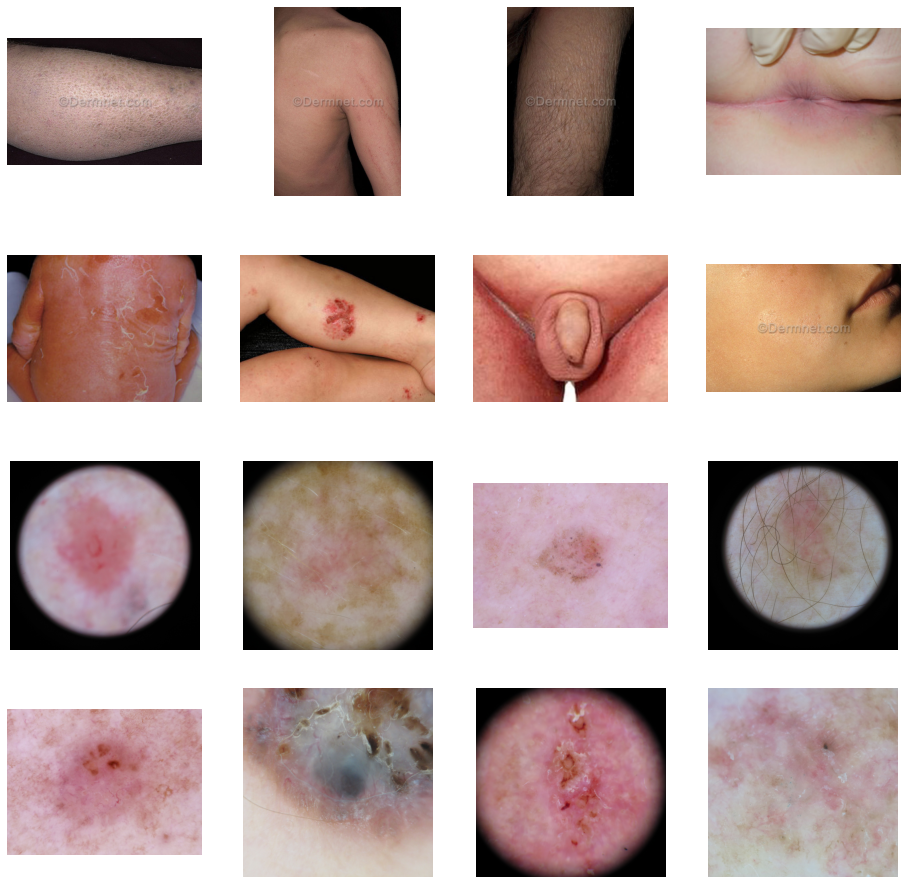

In [19]:
# lets see how does our data looks
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_atopic_dermatitis_fnames = os.listdir(Atopic_Dermatitis_Train_Dir)
train_basal_cell_carcinoma_fnames = os.listdir(Basal_Cell_Carcinoma_Train_Dir)



next_atopic_dermatitis_pix = [os.path.join(Atopic_Dermatitis_Train_Dir, fnames) for fnames in train_atopic_dermatitis_fnames[pic_index-8:pic_index]]
next_basal_cell_carcinoma_pix = [os.path.join(Basal_Cell_Carcinoma_Train_Dir, fnames) for fnames in train_basal_cell_carcinoma_fnames[pic_index -8:pic_index]]

for i, img_path in enumerate(next_atopic_dermatitis_pix + next_basal_cell_carcinoma_pix):
  # Set up subplot, the subplot indices start at 1
  sp = plt.subplot(nrows, ncols,i+1)
  sp.axis('Off') # for not showing axes or gridlines
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [20]:
# Creating train and test data generators
train_datagen = ImageDataGenerator(rescale = 1./255., 
                                   rotation_range = 40, 
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2,
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   fill_mode = "nearest",
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255. )

In [21]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size = 40, 
                                                    class_mode = 'categorical', 
                                                    target_size = (300, 300))

# Flow test images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                        batch_size = 40,
                                                        class_mode = 'categorical', 
                                                        target_size = (300, 300))

Found 20666 images belonging to 11 classes.
Found 2301 images belonging to 11 classes.


In [18]:
train_generator.class_indices

{'Atopic_Dermatitis': 0,
 'Basal_Cell_Carcinoma': 1,
 'Benign_Keratosis_Like_Lesions': 2,
 'Clean_Skin': 3,
 'Eczema': 4,
 'Lichen_Planus': 5,
 'Melanocytic_Nevi': 6,
 'Melanoma': 7,
 'Seborrheic_Keratoses': 8,
 'Tinea_Ringworm_Candidiasis_And_Other_Fungal_Infections': 9,
 'Warts_Molluscum_And_Other_Viral_Infections': 10}

In [19]:
# Loading the base model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#base_model = InceptionV3(input_shape = [300,300,3], include_top = False, weights = "imagenet")

#base_model = tf.keras.applications.VGG19(
 #           weights='imagenet',
  #          include_top=False ,
   #         input_shape=[150,150, 3]
    #    )

#base_model =tf.keras.applications.InceptionResNetV2(
 #   include_top=False,
  #  weights="imagenet",
   # input_shape=[150,150,3],
#)

#base_model = tf.keras.applications.EfficientNetB7(include_top = False, weights='imagenet', input_shape=[150,150,3])

#base_model = tf.keras.applications.vgg19.VGG19(
 #   include_top = False,
  #  weights = "imagenet",
   # input_shape = [150,150,3]
#)

base_model=tf.keras.applications.inception_v3.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=[300,300,3],
    
)

87910968/87910968 [==============================] - 3s 0us/step


In [20]:
# Since we only change the last layer
for layer in base_model.layers:
  layer.trainable = False

In [21]:
# lets check the summary of the base model
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [22]:
# Creating and compiling the model

input_layer = tf.keras.layers.Input(shape=(300,300, 3), name='input') 
        
x = base_model(input_layer)

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling2d')(x)
x = tf.keras.layers.BatchNormalization()(x)   
x = tf.keras.layers.Dense(1400,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1346,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1220,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(1000,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(846,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(500,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
        
output = tf.keras.layers.Dense(units=11, 
                              activation='softmax', 
                              name='output')(x)

model = tf.keras.models.Model(input_layer, output)    
model.compile(optimizer='adam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])




In [23]:
!pip install pyyaml h5py  # Required to save models in HDF5 format
import tensorflow as tf
from tensorflow import keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
checkpoint_path = "/content/drive/MyDrive/finalModal/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                                 monitor="accuracy", 
                                                 save_weights_only=True,
                                                 verbose=1)


# Here we will create a custom call back layer/ function to perform early stopping
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy")>0.90):
      print("\nReached 90% accuracy, Stop!")
      self.model.stop_training = True

# Class Instantiation
es_callback = myCallback()

In [36]:

model.load_weights('/content/drive/MyDrive/tryFinalCheckpoint/cp.ckpt')

In [37]:
inc_history = model.fit(train_generator, validation_data = test_generator, epochs=10,verbose=2, callbacks = [cp_callback,es_callback])

Epoch 1/10

Epoch 1: accuracy improved from -inf to 0.90052, saving model to /content/drive/MyDrive/finalModal/cp.ckpt

Reached 90% accuracy, Stop!
618/618 - 791s - loss: 0.2790 - accuracy: 0.9005 - val_loss: 0.2387 - val_accuracy: 0.9130 - 791s/epoch - 1s/step


In [38]:
model.save('/content/drive/MyDrive/finalModal/model90.h5')

In [23]:
import pickle

In [41]:
pickle.dump(model, open('/content/drive/MyDrive/finalModal/model90.pkl', 'wb'))


In [24]:
pickled_model = pickle.load(open('/content/drive/MyDrive/finalModal/model90.pkl', 'rb'))


In [ ]:
# lets get the keys to plot accuracy
inc_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<Figure size 432x288 with 0 Axes>

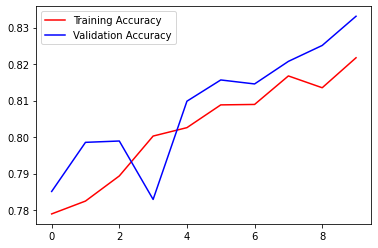

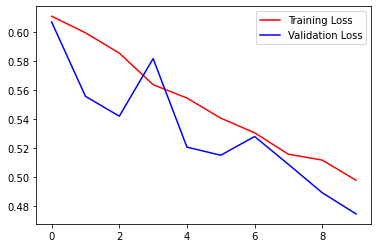

<Figure size 432x288 with 0 Axes>

In [ ]:
# Lets plot Accuracy and Loss
acc = inc_history.history["accuracy"]
val_acc = inc_history.history['val_accuracy']
loss = inc_history.history['loss']
val_loss = inc_history.history['val_loss']

epochs = range(len(acc))

# Accuracy Plot
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.legend()
plt.figure()

# Loss Plot
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.legend()
plt.figure()

Lets test our model in some unseen datas.

In [42]:
uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting Images
  path = "/content/" + fn
  img = tf.keras.utils.load_img(path, target_size=(300, 300))
  x = tf.keras.utils.img_to_array(img)
  x = x/255.
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  # classes = model.predict(images, batch_size=40)
  a=np.argmax(pickled_model.predict(images,batch_size=40), axis=1)  
  if(a == 0):
    print("Atopic Dermatitis")
  elif(a==1):
    print("Basal Cell Carcinoma")
  elif(a==2):
    print("Benign Keratosis Like Lesions")
  elif(a==3):
    print("Clean Skin")
  elif(a==4):
    print("Eczema")
  elif(a==5):
    print("Lichen Planus")
  elif(a==6):
    print("Melanocytic Nevi")
  elif(a==7):
    print("Melanoma")
  elif(a==8):
    print("Seborraheic Keratoses")
  elif(a==9):
    print("Tinea Ringworm Candidiasis and Other Fungal Infections")
  elif(a==10):
    print("Warts Molluscum and other Viral Infections")


Saving atopic.jpeg to atopic.jpeg
Saving clean_try.jpeg to clean_try (1).jpeg
Saving seborrheic_kera_try.jpeg to seborrheic_kera_try (1).jpeg
Saving warts.jpeg to warts (1).jpeg
1/1 [==============================] - 0s 27ms/step
Atopic Dermatitis
1/1 [==============================] - 0s 26ms/step
Clean Skin
1/1 [==============================] - 0s 28ms/step
Seborraheic Keratoses
1/1 [==============================] - 0s 29ms/step
Warts Molluscum and other Viral Infections
